# Mahmoud Assem Morsi Mohamed Abbas
# GH1024463

# Spotify reviews dataset

# Big Data Analytics M508B

# Final individual assignment

# Introduction
As digital platforms have grown in popularity, user-generated content—particularly reviews—has emerged as a vital source of feedback for businesses. For Spotify to stay competitive in the music streaming market, it is critical to comprehend user sentiments and preferences through these reviews. This project makes use of the extensive dataset of 2022 Spotify app reviews that was obtained from Kaggle in order to gather feedback and user experiences.


URL:https://www.kaggle.com/datasets/mfaaris/spotify-app-reviews-2022

# Problem statment
It is difficult to extract useful insights from massive amounts of unstructured review data. In order to discover user sentiments and important topics, this project will analyze Spotify app reviews in an efficient manner. The goals are to clean up the data, analyze sentiment, model topics using LDA to assess topic relevance, perform topic modelling, and visualize the findings to help Spotify improve user experience and inform app development strategies.By fulfilling these goals, the project desires to convert unprocessed review data into strategic insights that will improve Spotify's user experience and assist in making decisions about app development and marketing approaches.


# importing important liberiries

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import classification_report
from gensim.models import CoherenceModel, LdaModel, Phrases
from gensim.corpora.dictionary import Dictionary
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import numpy as np
from joblib import Parallel, delayed
!pip install gensim
from gensim.models.phrases import Phrases, Phraser

#downloading stopwords
We're downloading a list of commonly used words with little meaning, such as "the," "and," or "is." These are commonly referred to as stopwords. We'll use them later to clean up the text in our reviews, allowing us to focus on the important points.

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

#importing SpaCy's English Model
We're now loading SpaCy, a unique tool that helps us perceive and analyze English text. It can break down phrases into words, identify what type of word each is (such as a noun or verb), and even find names of individuals or locations.

In [ ]:

nlp = spacy.load("en_core_web_sm")


#Import Data into CSV


We are preparing to bring in our data here. We can upload a file straight into this program with the help of this code. The reviews we wish to analyze are in a dataset called spotify.csv, which we aim to use.


In [ ]:


from google.colab import files
uploaded = files.upload()

Saving spotify.csv to spotify.csv


#Loading Data and Conducting Initial Research


Our dataset has been successfully loaded into a DataFrame format. Consider it as a table with reviews in each row and details about each review in each column. The head() function provides us with an overview of the data's appearance by displaying the first few rows.


In [ ]:
# Data Loading and Initial Exploration
df = pd.read_csv('spotify.csv')
df.head()


,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN


#Basic Data Information
These lines clarify the range and structure of our dataset:
The number of rows (reviews) and columns (each review's attributes) in our dataset are printed out.



In [ ]:
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])
print(df.size)

Number of Rows: 61594
Number of Columns: 5
307970


Further details is provided by df.info(), such as the kind of data in each column and the potential amount of missing data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61594 entries, 0 to 61593
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Time_submitted  61594 non-null  object
 1   Review          61594 non-null  object
 2   Rating          61594 non-null  int64 
 3   Total_thumbsup  61594 non-null  int64 
 4   Reply           216 non-null    object
dtypes: int64(2), object(3)
memory usage: 2.3+ MB


#Checking missing data

We're checking to see if there are any missing (or "null") reviews and counting how many are in each column. A comprehensive set of data is important for precise analysis.


In [ ]:
df.isnull().sum()

Time_submitted        0
Review                0
Rating                0
Total_thumbsup        0
Reply             61378
dtype: int64

#Printing the columns
It makes it easier to quickly understand the structure and content of my dataset. In order to gain valuable insights about user sentiment, preferences, and Spotify app experiences, i can plan how to clean, transform, and analyze the data in this initial step of data exploration and analysis.



In [ ]:
print(df.columns)

Index(['Time_submitted', 'Review', 'Rating', 'Total_thumbsup', 'Reply'], dtype='object')


#Removing Duplicates and Null Values


As part of our data cleaning process, we're removing any rows in which the review itself does not exist (dropna) and any duplicate reviews (drop_duplicates). This guarantees the uniqueness and completion of every review we examine.


In [ ]:
df = df.dropna(subset=['Reply'])
df = df.drop_duplicates()

#Summary Statistics

We now have some fundamental statistics regarding our numerical data. It might provide information on the typical length of reviews or the distribution of ratings, for instance. It facilitates our ability to quickly grasp the appearance of our data.


In [ ]:
df.describe()

,Rating,Total_thumbsup
count,216.000000,216.000000
mean,2.412037,18.041667
std,1.543672,77.058016
min,1.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,2.000000
75%,4.000000,8.250000
max,5.000000,867.000000


# Data Preprocessing and Data Cleaning
SpaCy is used for preprocessing and tokenization.
We will tokenize, lemmatize, and remove punctuation and stop words from every review.We clean up the reviews by removing unnecessary words and correcting grammar mistakes to make them easier to analyze.


In [ ]:
def preprocess_text(text):
    doc = nlp(text)
    tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and len(token) > 2]
    return tokens

df['cleaned_text'] = df['Review'].apply(preprocess_text)
df.head()

,Time_submitted,Review,Rating,Total_thumbsup,Reply,cleaned_text
73,2022-07-09 09:50:47,"Great song selection, amazing audio quality. H...",3,8,"Hey, thanks for the feedback! We'd love to hel...","[great, song, selection, amazing, audio, quali..."
699,2022-07-08 01:51:27,Seems like the random stopping of music has be...,4,4,"Hey, thanks for the report. If you haven't tri...","[like, random, stopping, music, fixed.thank, p..."
1151,2022-07-07 03:39:14,They would add their songs to MY PLAYLIST! I c...,1,1,"Hey, thanks for the feedback! You can always a...","[add, song, playlist, playlist, have, song]"
1277,2022-07-06 20:16:03,I paid last month for Premium Family & my wife...,5,0,Hi James! We’re sorry to hear that. We’d love ...,"[pay, month, premium, family, wife, unfortunat..."
1668,2022-07-06 00:59:54,I really don't care about the random pauses in...,3,0,"Hi again. If you haven't tried Premium yet, we...","[care, random, pause, music, upset, day, shuff..."


This code shows how to use Gensim's Phrases and Phraser functions to combine and identify bi- and tri-grams when preprocessing text data. By transforming the text in this manner, the data is prepared for more advanced natural language processing tasks, which improves the analysis' accuracy and insight.

In [ ]:
texts = df['cleaned_text'].tolist()
bigram = Phrases(texts, min_count=5, threshold=100)
trigram = Phrases(bigram[texts], threshold=100)

bigram_mod = Phraser(bigram)
trigram_mod = Phraser(trigram)

texts = [bigram_mod[doc] for doc in texts]
texts = [trigram_mod[doc] for doc in texts]
df['cleaned_text'] = texts

#Sentiment Analysis using TextBlob
Each review is examined using TextBlob to determine whether it is neutral, positive, or negative. This gives us an idea of how people feel about Spotify generally.




In [ ]:
def get_sentiment(text):
    analysis = TextBlob(' '.join(text))
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

df['sentiment'] = df['cleaned_text'].apply(get_sentiment)
df.head()

,Time_submitted,Review,Rating,Total_thumbsup,Reply,cleaned_text,sentiment
73,2022-07-09 09:50:47,"Great song selection, amazing audio quality. H...",3,8,"Hey, thanks for the feedback! We'd love to hel...","[great, song, selection, amazing, audio, quali...",Positive
699,2022-07-08 01:51:27,Seems like the random stopping of music has be...,4,4,"Hey, thanks for the report. If you haven't tri...","[like, random, stopping, music, fixed.thank, p...",Negative
1151,2022-07-07 03:39:14,They would add their songs to MY PLAYLIST! I c...,1,1,"Hey, thanks for the feedback! You can always a...","[add, song, playlist, playlist, have, song]",Neutral
1277,2022-07-06 20:16:03,I paid last month for Premium Family & my wife...,5,0,Hi James! We’re sorry to hear that. We’d love ...,"[pay, month, premium, family, wife, unfortunat...",Positive
1668,2022-07-06 00:59:54,I really don't care about the random pauses in...,3,0,"Hi again. If you haven't tried Premium yet, we...","[care, random, pause, music, upset, day, shuff...",Negative


This code snippet uses the'sentiment' column in the DataFrame df to compute and print the count of each sentiment category (Positive, Neutral, and Negative).

In [ ]:
sentiment_count = df['sentiment'].value_counts()
print(sentiment_count)

sentiment
Positive    96
Negative    83
Neutral     37
Name: count, dtype: int64


Using seaborn (sns) and matplotlib (plt), this code generates a bar plot with labels for sentiment categories on the x-axis and review counts on the y-axis that displays the total count of reviews categorized by sentiment ('Positive', 'Neutral', and 'Negative').









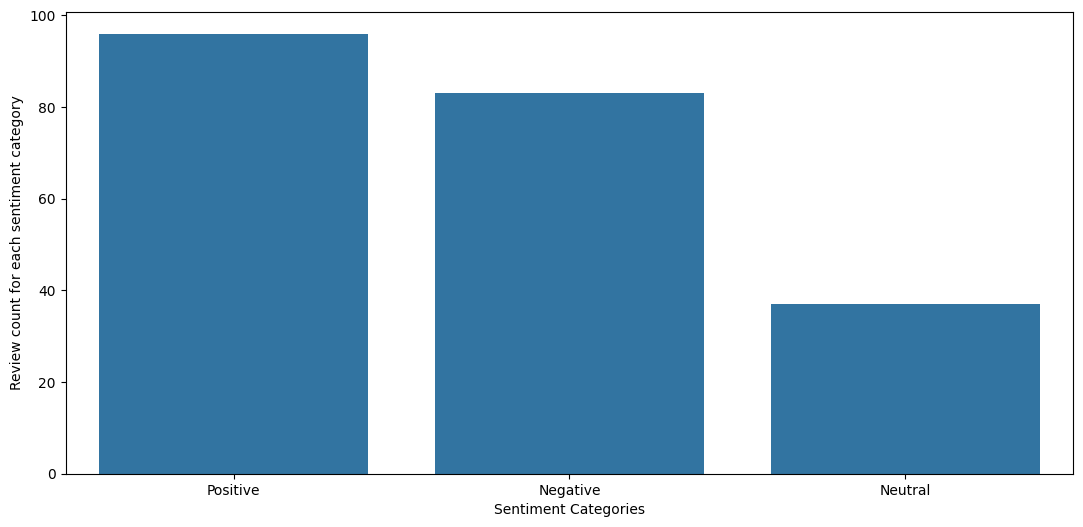

In [ ]:
plt.figure(figsize=(13,6))
ax = sns.barplot(x=sentiment_count.keys(), y=sentiment_count)
plt.xlabel("Sentiment Categories")
plt.ylabel("Review count for each sentiment category")
plt.show()

#LDA Topic Modeling
applying Latent Dirichlet Allocation (LatentDirichletAllocation) and text conversion to a numerical format (CountVectorizer) to identify five themes in the Spotify app reviews. additionally based on their weights in the LDA model, prints the top 20 most relevant terms for each subject.


In [ ]:
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english', tokenizer=lambda x: x, preprocessor=lambda x: x)
dtm = vectorizer.fit_transform(df['cleaned_text'])
lda = LatentDirichletAllocation(n_components=20, random_state=42, max_iter=100, learning_decay=0.7)
lda.fit(dtm)

for index, topic in enumerate(lda.components_):
    print(f"Topic {index}")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  warnings.warn(


Topic 0
['edit', 'play', 'work', 'download', 'time', 'feature', 'premium', 'spotify', 'song', 'app']
Topic 1
['great', 'bad', 'phone', 'song', 'time', 'work', 'spotify', 'update', 'music', 'app']
Topic 2
['couple', 'episode', 'restart', 'podcast', 'stop', 'song', 'play', 'update', 'download', 'app']
Topic 3
['press', 'app', 'spotify', 'pay', 'listen', 'add', 'play', 'want', 'playlist', 'song']
Topic 4
['phone', 'list', 'swipe', 'skip', 'great', 'good', 'app', 'queue', 'play', 'song']
Topic 5
['premium', 'buy', 'work', 'way', 'spotify', 'rogan', 'joe', 'app', 'star', 'play']
Topic 6
['player', 'phone', 'play', 'friend', 'make', 'time', 'audio', 'spotify', 'fix', 'need']
Topic 7
['playlist', 'want', 'premium', 'music', 'spotify', 'listen', 'play', 'like', 'app', 'song']
Topic 8
['playlist', 'play', 'pay', 'song', 'stop', 'skip', 'premium', 'spotify', 'app', 'like']
Topic 9
['randomly', 'spotify', 'day', 'shuffle', 'music', 'update', 'song', 'play', 'app', 'stop']
Topic 10
['play', 'rate'

# LDA Topic Modeling Evaluation
By calculating coherence scores over a range of topic numbers, LDA models' quality is evaluated.dictionary and corpus: df['cleaned_text'] documents are transformed into a bag-of-words format (corpus) and a dictionary of words is created (dictionary).


In [ ]:
dictionary = Dictionary(df['cleaned_text'])
corpus = [dictionary.doc2bow(text) for text in df['cleaned_text']]

#Coherence score computation function for multiple number of topics
Calculates coherence scores for LDA models with 2–20 different topic counts (num_topics).

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=20, alpha='auto', eta='auto')
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

#Calculate coherence values at the same time
Accelerates the computation of coherence scores by utilising both parallel and delayed processing.





In [ ]:
start = 2
limit = 20
step = 2
topics_range = range(start, limit, step)

def compute_single_coherence(num_topics):
    model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=20, alpha='auto', eta='auto')
    coherencemodel = CoherenceModel(model=model, texts=df['cleaned_text'], dictionary=dictionary, coherence='c_v')
    return model, coherencemodel.get_coherence()

results = Parallel(n_jobs=-1)(delayed(compute_single_coherence)(num_topics) for num_topics in topics_range)
model_list, coherence_values = zip(*results)

# Plotting coherence values
The ideal number of topics (Num Topics) is determined by plotting coherence scores against the total number of topics (Coherence score) and selecting the highest coherence score.


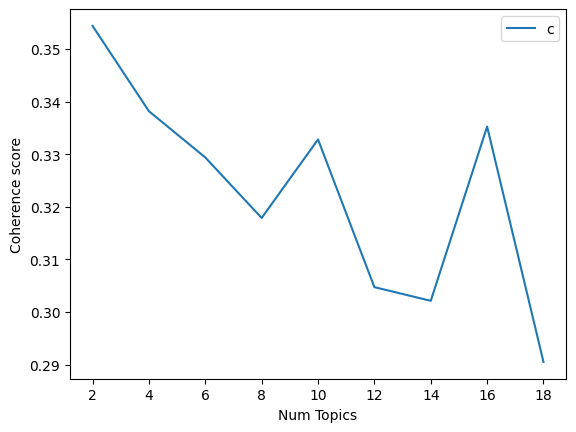

In [ ]:
plt.plot(topics_range, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


#Identifying the ideal LDA Model:

 LDA models that were trained on a variety of topics are included in the model_list. Optimal_model chooses the LDA model that matches the highest coherence score by locating the index of the highest coherence score (optimal_coherence) in the coherence_values list.It provides information about how well the LDA model captures different themes in the Spotify reviews dataset by printing the optimal number of topics as well as the coherence score.


In [ ]:
optimal_model = model_list[coherence_values.index(max(coherence_values))]
optimal_coherence = max(coherence_values)
print(f'Optimal number of topics: {topics_range[coherence_values.index(optimal_coherence)]}')
print(f'Optimal Coherence Score: {optimal_coherence}')

Optimal number of topics: 2
Optimal Coherence Score: 0.35438986757379837


#Reporting and Visualization
The top words (n_top_words) in each of the five topics that the LDA model (lda) identified are displayed as horizontal bar charts by the plot_top_words function. The main themes found in the reviews are made easier to understand by each chart, which displays the most relevant phrases (feature_names) according to their weights in the model's components.









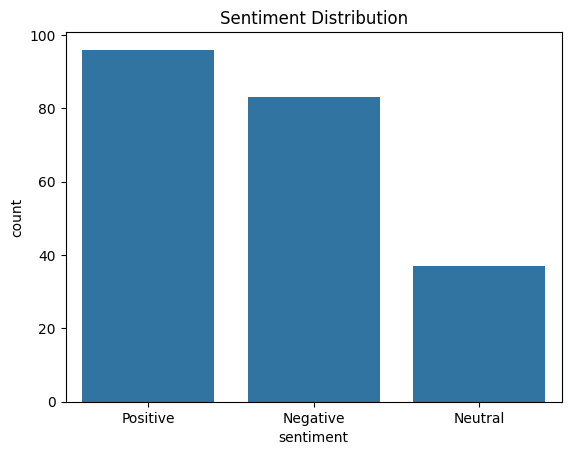

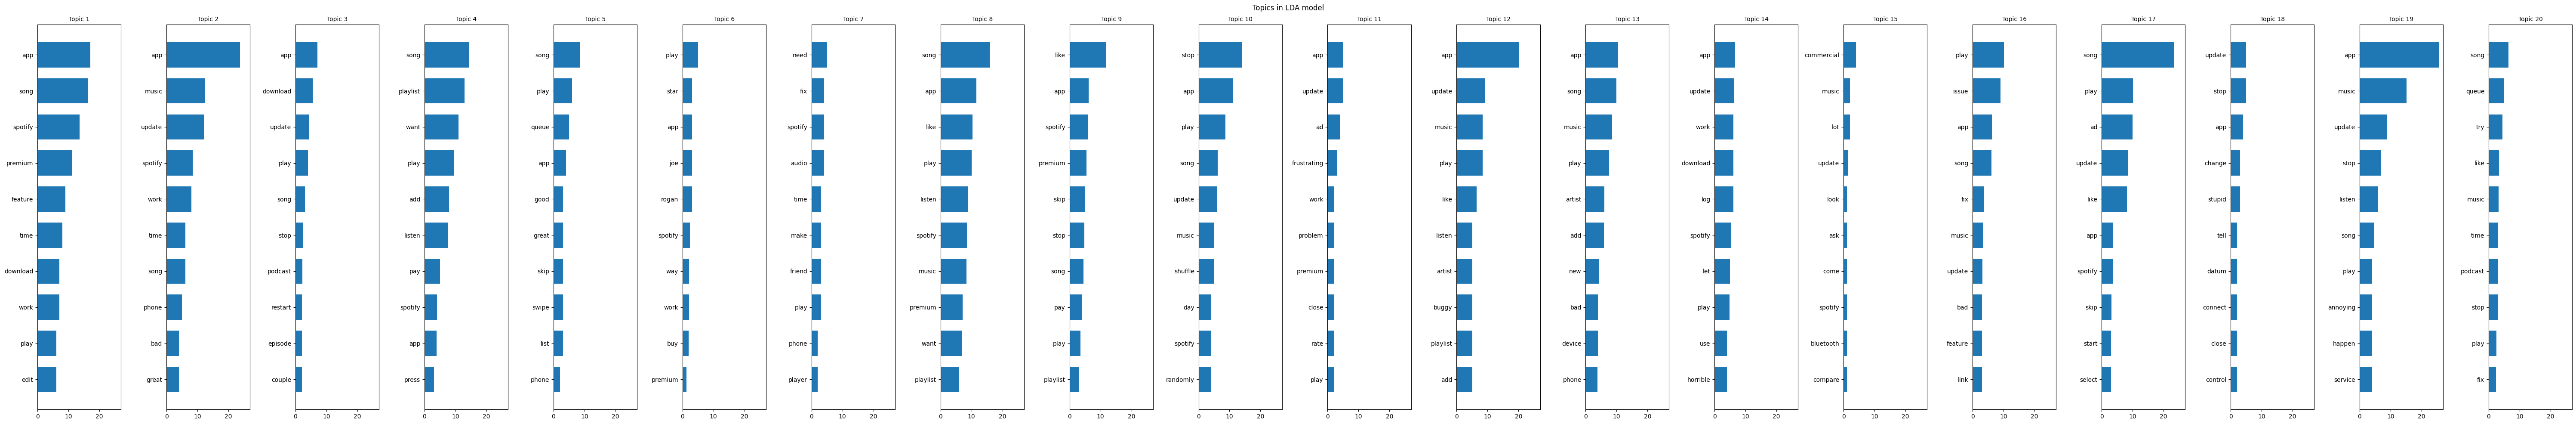

In [ ]:
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

def plot_top_words(model, feature_names, n_top_words, title):
    num_topics = model.components_.shape[0] # Get the number of topics from the model
    fig, axes = plt.subplots(1, num_topics, figsize=(3 * num_topics, 10), sharex=True) # Adjust figure size based on number of topics
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx + 1}', fontdict={'fontsize': 10})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=10)
    plt.suptitle(title, fontsize=12)
    plt.tight_layout() # Adjust layout to prevent overlapping
    plt.show()

plot_top_words(lda, vectorizer.get_feature_names_out(), 10, 'Topics in LDA model')

#Final discussion
 This project uses text analytics methods to do a thorough analysis of Spotify app reviews. It reveals user sentiments and identifies important discussion topics by preprocessing data, executing sentiment analysis, and using LDA . Robust topic extraction is ensured through evaluation via coherence scores, and visualizations facilitate comprehension of topic relevance and sentiment distribution. This method supports informed decisions in app development and marketing strategies by providing actionable insights that can be applied across various datasets. The ultimate goal is to improve the overall user experience.

